original image:


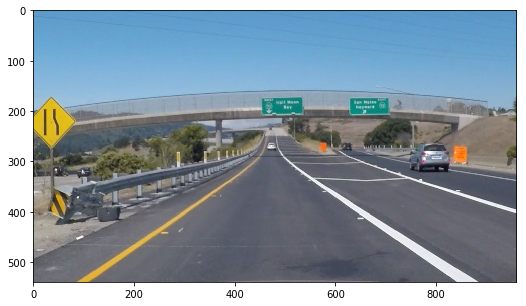

image gray vs image gray with gaussian:


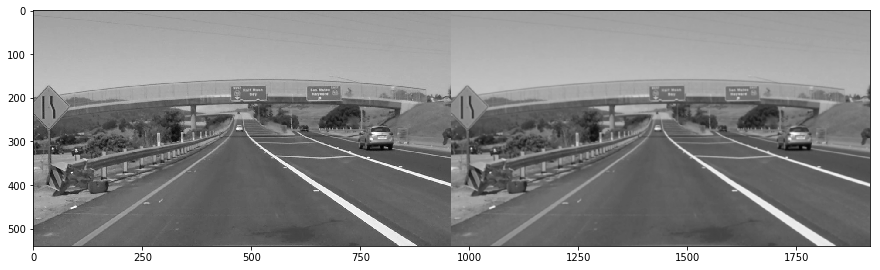

canny edge with no gaussian vs canny edge with gaussian:


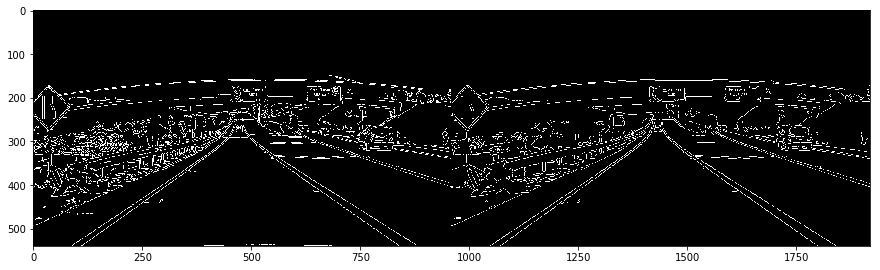

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
plt.rcParams['figure.figsize'] = [10, 5]
print('original image:')
image = mpimg.imread('images/exit-ramp.jpg')
plt.imshow(image)
plt.show()

imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5

# apply gaussian blur
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# adjust matplotlib size
plt.rcParams['figure.figsize'] = [15, 15]
print('image gray vs image gray with gaussian:')
plt.imshow(np.hstack([imgray, blur_gray]), cmap='gray')
plt.show()

# define gradient threshold for canny algorithm (using 1:3 ratio)
low_threshold = 50
high_threshold = 150


edges_no_gaussian = cv2.Canny(imgray, low_threshold, high_threshold)
edges_with_gaussian = cv2.Canny(blur_gray, low_threshold, high_threshold)
print('canny edge with no gaussian vs canny edge with gaussian:')
plt.imshow(np.hstack([edges_no_gaussian, edges_with_gaussian]), cmap='Greys_r')
plt.show()

manual canny vs auto canny:


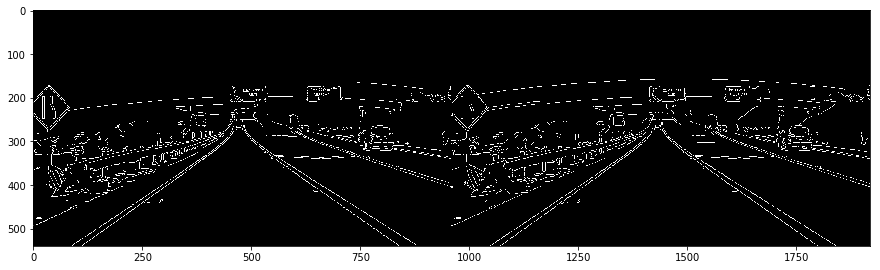

In [70]:
# automatically calculate lower and upper threshold of 
# image gradient and run canny edge detection
# 
# adapted from: 
# https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/
def auto_canny(image, sigma=0.33, kernel_size=5):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    
    image = cv2.GaussianBlur(image,(kernel_size, kernel_size), 0)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

print('manual canny vs auto canny:')
imcanny = auto_canny(gray)
plt.imshow(np.hstack([edges, imcanny]), cmap='gray')
plt.show()